# TIES5830 Assignment 1

#### Author: Heikki Kurhinen

#### Task:

Solve two benchmark problems with 2 and 5 number of objectives and 10 decision variables from the DTLZ family having a) degenerate and b) disconnected Pareto front. Use RVEA and NSGA-III to solve the defined MOPs by running them for 1000 generations (and 100 generations/iteration).

● Calculate the hypervolume of the solutions from all the different combinations of problem instances and MOEAs.

● Plot the final solutions for the bi-objective cases for comparing them visually.

Submit a jupyter notebook or pdf containing codes, plots and table. Add short descriptions as well.

#### Solution:

I selected the following DTLZ test problems:

- DTLZ5 (Degenerate)
- DTLZ7 (Disconnected)

In [8]:
# Import required packages
import numpy as np
from desdeo_problem.testproblems import test_problem_builder
from desdeo_emo.EAs import NSGAIII
from desdeo_emo.EAs import RVEA
from desdeo_tools.utilities.quality_indicator import hypervolume_indicator
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [20]:
# Define some helper functions

# Runs evolver until it reaches stopping condition
def runEA(evolver):
    i = 0
    while evolver.continue_evolution():
        i = i+1
        evolver.iterate()
    print(f"EA done after: {i} generations")
    return evolver.end()

# Solves given multiobjective optimization problem using NSGAIII algorithm
def solveWithNSGAIII(problem):
    evolver = NSGAIII(problem,
                      interact=False,
                      n_iterations=1000,
                      n_gen_per_iter=100,
                      population_size=20)
    
    return runEA(evolver)

# Solves given multiobjective optimization problem using RVEA algorithm
def solveWithRVEA(problem):
    evolver = RVEA(problem,
                   interact=False,
                   n_iterations=1000,
                   n_gen_per_iter=100,
                   population_size=20)
    
    return runEA(evolver)

# Approximates the reference point (slighty worse than nadir)
def calculateReferencePoint(nadir):
    return nadir + 0.0001

# Calculates hypervolume for given front, uses point which is slighty worse than nadir
# as reference point
def calculateHypervolume(front):
    nadir = np.max(front, axis=0)
    ref = calculateReferencePoint(nadir)
    return hypervolume_indicator(front, ref)

In [6]:
# Create test problems using Desdeo's test problem builder
dtlz5with2objectives = test_problem_builder("DTLZ5", 10, 2)
dtlz5with5objectives = test_problem_builder("DTLZ5", 10, 5)

dtlz7with2objectives = test_problem_builder("DTLZ7", 10, 2)
dtlz7with5objectives = test_problem_builder("DTLZ7", 10, 5)

In [47]:
#Compute solutions to DTLZ5 problems using NSGAIII and RVEA algorithms
_, dtlz5BiObjectiveNSGAIIIFront = solveWithNSGAIII(dtlz5with2objectives)
_, dtlz5FiveObjectiveNSGAIIIFront = solveWithNSGAIII(dtlz5with5objectives)
_, dtlz5BiObjectiveRVEAFront = solveWithRVEA(dtlz5with2objectives)
_, dtlz5FiveObjectiveRVEAFront = solveWithRVEA(dtlz5with5objectives)

#Compute solutions to DTLZ7 problems using NSGAIII and RVEA algorithms
_, dtlz7BiObjectiveNSGAIIIFront = solveWithNSGAIII(dtlz7with2objectives)
_, dtlz7FiveObjectiveNSGAIIIFront = solveWithNSGAIII(dtlz7with5objectives)
_, dtlz7BiObjectiveRVEAFront = solveWithRVEA(dtlz7with2objectives)
_, dtlz7FiveObjectiveRVEAFront = solveWithRVEA(dtlz7with5objectives)


EA done after: 1000 generations
EA done after: 1000 generations
EA done after: 1000 generations
EA done after: 1000 generations
EA done after: 1000 generations
EA done after: 1000 generations
EA done after: 1000 generations
EA done after: 1000 generations


In [48]:
print(f"DTLZ5 (Degenerate), 2 Obj, 10 Var, Hv (NSGAIII) {calculateHypervolume(dtlz5BiObjectiveNSGAIIIFront)}, Hv (RVEA) {calculateHypervolume(dtlz5BiObjectiveRVEAFront)}")
print(f"DTLZ5 (Degenerate), 5 Obj, 10 Var, Hv (NSGAIII) {calculateHypervolume(dtlz5FiveObjectiveNSGAIIIFront)}, Hv (RVEA) {calculateHypervolume(dtlz5FiveObjectiveRVEAFront)}")
print(f"DTLZ7 (Disconnected), 2 Obj, 10 Var, Hv (NSGAIII) {calculateHypervolume(dtlz7BiObjectiveNSGAIIIFront)}, Hv (RVEA) {calculateHypervolume(dtlz7BiObjectiveRVEAFront)}")
print(f"DTLZ7 (Disconnected), 5 Obj, 10 Var, Hv (NSGAIII) {calculateHypervolume(dtlz7FiveObjectiveNSGAIIIFront)}, Hv (RVEA) {calculateHypervolume(dtlz7FiveObjectiveRVEAFront)}")

DTLZ5 (Degenerate), 2 Obj, 10 Var, Hv (NSGAIII) 0.09309441298263217, Hv (RVEA) 0.20584404834832679
DTLZ5 (Degenerate), 5 Obj, 10 Var, Hv (NSGAIII) 0.12235581463091469, Hv (RVEA) 3.2429765712735072
DTLZ7 (Disconnected), 2 Obj, 10 Var, Hv (NSGAIII) 0.5053433328969864, Hv (RVEA) 0.4807386382709738
DTLZ7 (Disconnected), 5 Obj, 10 Var, Hv (NSGAIII) 0.006418788041460241, Hv (RVEA) 1.471271589734619


#### Results:

| Pareto front type | Objectives (K) | Decision variables (n) | Hypervolume (NSGA-III) | Hypervolume (RVEA) |
|---|---|---|---|---|
| Degenerate (DTLZ5) | 2 | 10 | 0.0931 | 0.2058 |
| Degenerate (DTLZ5) | 5 | 10 | 0.1224 | 3.2430 |
| Disconnected (DTLZ5) | 2 | 10 | 0.5053 | 0.4807 |
| Disconnected (DTLZ5) |  5 | 10 | 0.0064 | 1.4713 |

In [9]:
# Helper function to draw plots
def plotFront(data, title):
    plt.scatter(data[:,0],data[:,1])
    plt.title(title)
    plt.show()

Plot values of all the bi-objective cases:

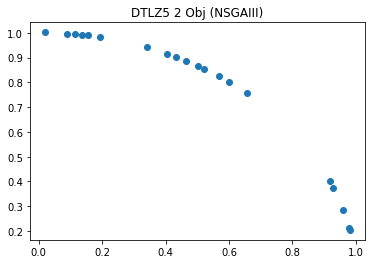

In [16]:
plotFront(dtlz5BiObjectiveNSGAIIIFront, "DTLZ5 2 Obj (NSGAIII)")

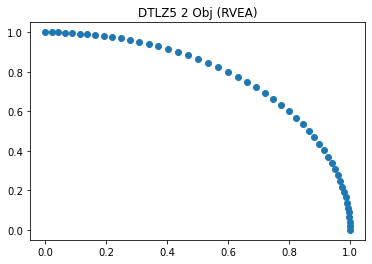

In [17]:
plotFront(dtlz5BiObjectiveRVEAFront, "DTLZ5 2 Obj (RVEA)")

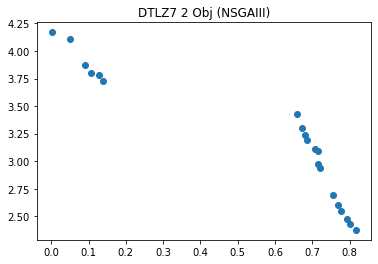

In [18]:
plotFront(dtlz7BiObjectiveNSGAIIIFront, "DTLZ7 2 Obj (NSGAIII)")

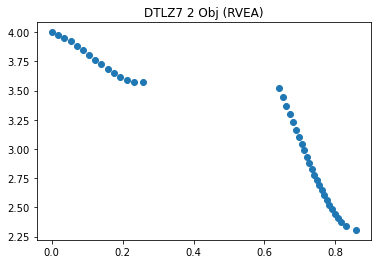

In [19]:
plotFront(dtlz7BiObjectiveRVEAFront, "DTLZ7 2 Obj (RVEA)")